In [2]:
import pandas as pd

In [3]:
import zipfile
path_to_zip_file = './BRFSS.zip'
with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
    zip_ref.extractall('./')

In [4]:
survey_df = pd.read_csv('brfss2020.csv', low_memory=False)
survey_df.head() #print the first five rows in the dataset 

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_RFPSA23,_CLNSCPY,_SGMSCPY,_SGMS10Y,_RFBLDS4,_STOLDNA,_VIRCOLN,_SBONTIM,_CRCREC1,_AIDTST4
0,1.0,1.0,1042020,1,4,2020,1100.0,2020000001,2.020000e+09,1.0,...,NaN,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,1.0
1,1.0,1.0,2072020,2,7,2020,1200.0,2020000002,2.020000e+09,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN
2,1.0,1.0,1232020,1,23,2020,1100.0,2020000003,2.020000e+09,1.0,...,NaN,1.0,3.0,3.0,3.0,3.0,3.0,3.0,1.0,2.0
3,1.0,1.0,1092020,1,9,2020,1100.0,2020000004,2.020000e+09,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
4,1.0,1.0,1042020,1,4,2020,1100.0,2020000005,2.020000e+09,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0


In [5]:
survey_selected_df = survey_df[['SEXVAR', '_IMPRACE', '_AGE65YR', 'GENHLTH', '_RFBMI5', '_TOTINDA', '_SMOKER3', 'DRNKANY5', 'DIABETE4', 'CVDSTRK3', 'CVDCRHD4', 'CVDINFR4']]
survey_selected_df.head()

,SEXVAR,_IMPRACE,_AGE65YR,GENHLTH,_RFBMI5,_TOTINDA,_SMOKER3,DRNKANY5,DIABETE4,CVDSTRK3,CVDCRHD4,CVDINFR4
0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,2.0,2.0
1,2.0,2.0,2.0,3.0,2.0,1.0,9.0,9.0,3.0,2.0,2.0,2.0
2,2.0,2.0,2.0,3.0,9.0,1.0,4.0,2.0,3.0,2.0,2.0,2.0
3,2.0,1.0,2.0,1.0,9.0,2.0,4.0,2.0,3.0,2.0,2.0,2.0
4,2.0,1.0,2.0,2.0,1.0,1.0,4.0,2.0,3.0,1.0,2.0,2.0


In [6]:
survey_selected_df.rename(columns={'SEXVAR': 'Gender',
                                   '_IMPRACE':'Race', 
                                   '_AGE65YR': 'AGE above 65', 
                                   'GENHLTH' : 'General Health', 
                                   '_RFBMI5': 'Over Weight',
                                   'DRNKANY5':'Alcohol Usage',
                                   '_TOTINDA':'Physical Active Status',
                                   '_SMOKER3':'Smoking',
                                   'DIABETE4':'Diabetes',
                                   'CVDSTRK3':'stroke',
                                   'CVDCRHD4':'Coronary Heart Disease',
                                   'CVDINFR4':'Heart Attack'},inplace=True) 

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [7]:
survey_selected_df.dropna(inplace=True) 

/usr/local/lib/python3.8/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [8]:
import numpy as np
#import sweetviz as sv
import matplotlib.pyplot as plt
import seaborn as sns

Gender 
 2.0    54.238899
1.0    45.761101
Name: Gender, dtype: float64


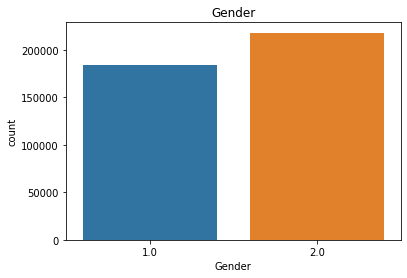

Race in %age:
 1.0    75.601079
5.0     9.057978
2.0     7.560755
6.0     3.501980
3.0     2.548365
4.0     1.729843
Name: Race, dtype: float64


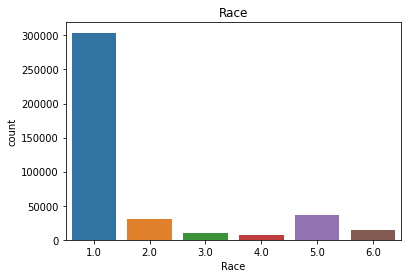

AGE above 65 %age:
 1.0    63.713104
2.0    34.234122
3.0     2.052774
Name: AGE above 65, dtype: float64


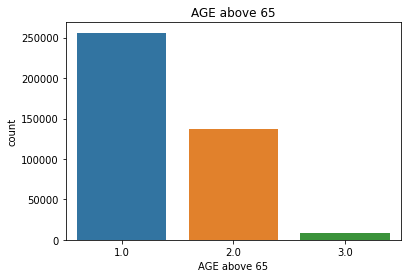

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


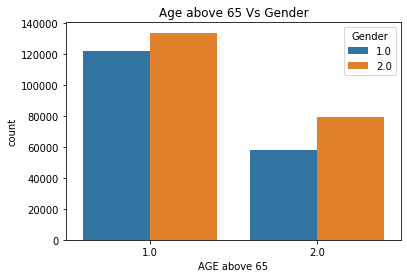

General Health:
 2.0    34.380342
3.0    29.704110
1.0    20.249789
4.0    11.572977
5.0     3.868497
7.0     0.159261
9.0     0.065025
Name: General Health, dtype: float64


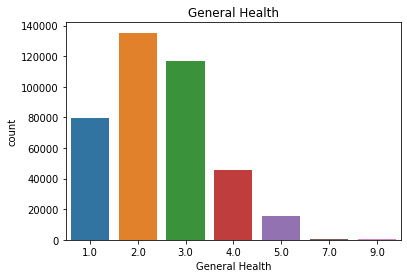

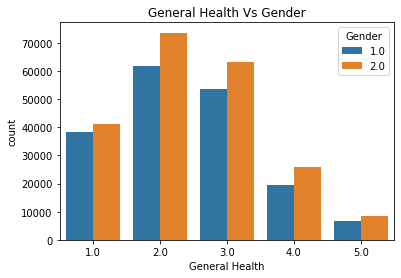

Over Weight:
 2.0    61.487997
1.0    29.086327
9.0     9.425677
Name: Over Weight, dtype: float64


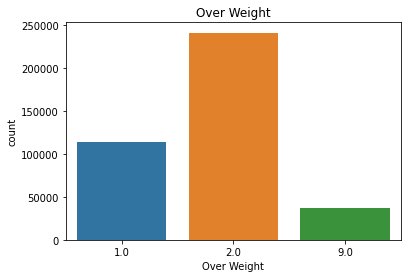

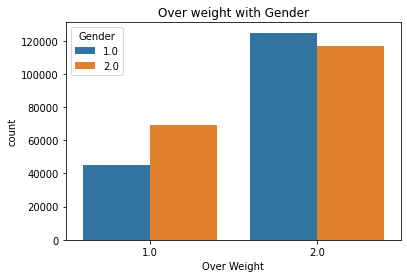

Physical Active Status:
 1.0    76.593729
2.0    23.272482
9.0     0.133789
Name: Physical Active Status, dtype: float64


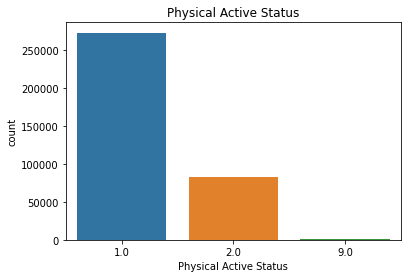

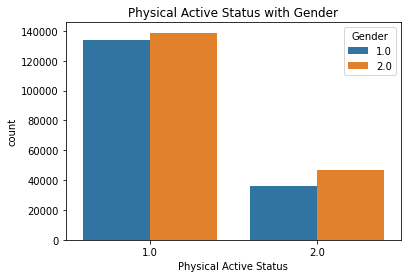

Smoking:
 4.0    58.194227
3.0    27.639087
1.0    10.324536
2.0     3.842149
Name: Smoking, dtype: float64


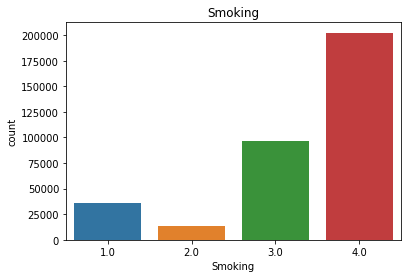

Smoking:
 4.0    58.194227
3.0    27.639087
1.0    10.324536
2.0     3.842149
Name: Smoking, dtype: float64


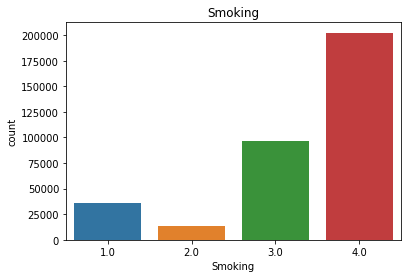

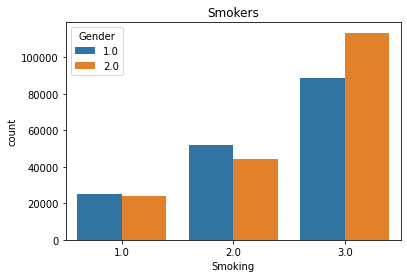

Alcohol Usage:
 1.0    51.302862
2.0    46.885498
9.0     0.987069
7.0     0.824571
Name: Alcohol Usage, dtype: float64


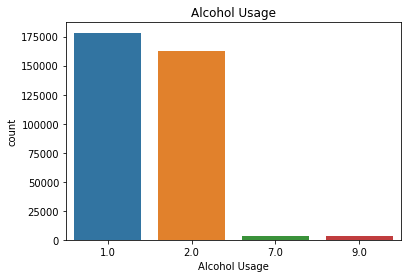

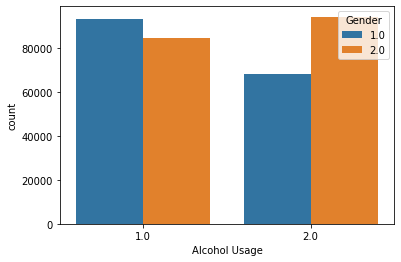

Diabetes :
 3.0    83.765528
1.0    13.114644
4.0     2.193634
2.0     0.799656
7.0     0.108085
9.0     0.018454
Name: Diabetes, dtype: float64


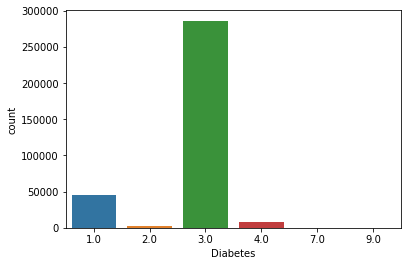

/usr/local/lib/python3.8/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


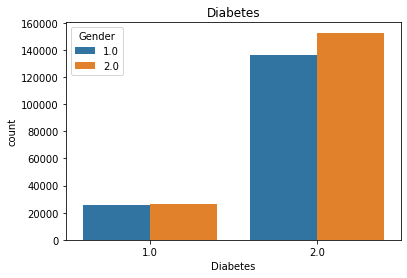

Stroke :
 2.0    95.798982
1.0     3.995718
7.0     0.196208
9.0     0.009092
Name: stroke, dtype: float64


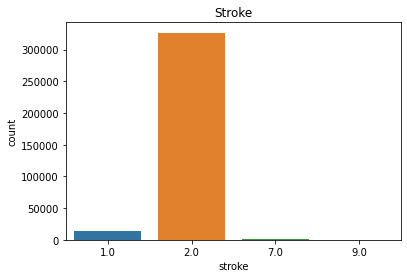

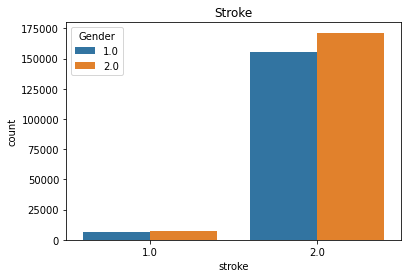

Coronary Heart Disease :
 2.0    93.459803
1.0     5.843975
7.0     0.682703
9.0     0.013519
Name: Coronary Heart Disease, dtype: float64


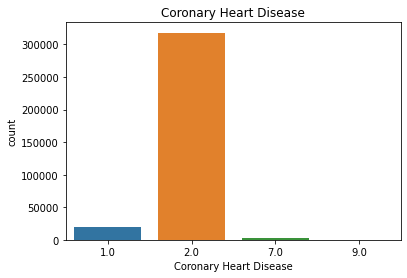

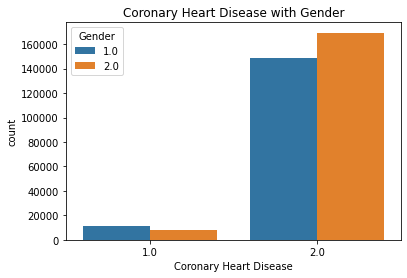

Heart Attack :
 2.0    94.256517
1.0     5.416460
7.0     0.316665
9.0     0.010358
Name: Heart Attack, dtype: float64


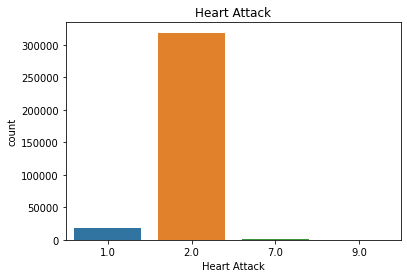

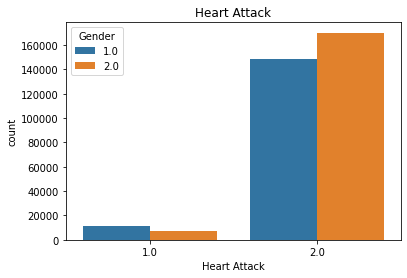

In [9]:
print("Gender \n",(survey_selected_df['Gender'].value_counts()/len(survey_selected_df))*100)
sns.countplot(x='Gender', data=survey_selected_df) 
plt.title('Gender')
plt.show() 
print("Race in %age:\n",(survey_selected_df['Race'].value_counts()/len(survey_selected_df))*100)
sns.countplot(x='Race', data=survey_selected_df) 
plt.title('Race')
plt.show()
print("AGE above 65 %age:\n",(survey_selected_df['AGE above 65'].value_counts()/len(survey_selected_df))*100)
sns.countplot(x='AGE above 65', data=survey_selected_df) 
plt.title('AGE above 65')
plt.show()  
survey_selected_df.drop(survey_selected_df[survey_selected_df['AGE above 65'] == 3].index, inplace = True)  #removed the rows which has age as option 3 
sns.countplot(x='AGE above 65', hue='Gender', data=survey_selected_df)
plt.title('Age above 65 Vs Gender')
plt.show()
print("General Health:\n",(survey_selected_df['General Health'].value_counts()/len(survey_selected_df))*100)
sns.countplot(x='General Health', data=survey_selected_df) 
plt.title('General Health')
plt.show()  
survey_selected_df=survey_selected_df[(survey_selected_df['General Health'] != 7) & (survey_selected_df['General Health'] != 9)]
survey_selected_df['General Health'].value_counts() # removed 7 and 9 options from dataset
sns.countplot(x='General Health', hue='Gender', data=survey_selected_df)
plt.title('General Health Vs Gender')
plt.show()
print("Over Weight:\n",(survey_selected_df['Over Weight'].value_counts()/len(survey_selected_df))*100)
sns.countplot(x='Over Weight', data=survey_selected_df) 
plt.title('Over Weight')
plt.show()  
survey_selected_df.drop(survey_selected_df[survey_selected_df['Over Weight'] == 9].index, inplace = True)
sns.countplot(x='Over Weight', hue='Gender', data=survey_selected_df)
plt.title('Over weight with Gender')
plt.show()
print("Physical Active Status:\n",(survey_selected_df['Physical Active Status'].value_counts()/len(survey_selected_df))*100)
sns.countplot(x='Physical Active Status', data=survey_selected_df) 
plt.title('Physical Active Status')
plt.show()  
survey_selected_df.drop(survey_selected_df[survey_selected_df['Physical Active Status'] == 9].index, inplace = True)
sns.countplot(x='Physical Active Status', hue='Gender', data=survey_selected_df)
plt.title('Physical Active Status with Gender')
plt.show()
survey_selected_df.drop(survey_selected_df[survey_selected_df['Smoking'] == 9].index, inplace = True)
print("Smoking:\n",(survey_selected_df['Smoking'].value_counts()/len(survey_selected_df))*100)
sns.countplot(x='Smoking', data=survey_selected_df) 
plt.title('Smoking')
plt.show() 
print("Smoking:\n",(survey_selected_df['Smoking'].value_counts()/len(survey_selected_df))*100)
sns.countplot(x='Smoking', data=survey_selected_df) 
plt.title('Smoking')
plt.show() 
change = {2 : 1, 3 : 2, 4 : 3}
survey_selected_df['Smoking'].replace(to_replace=change, inplace=True)
sns.countplot(x='Smoking', hue='Gender', data=survey_selected_df)
plt.title('Smokers')
plt.show()
print("Alcohol Usage:\n",(survey_selected_df['Alcohol Usage'].value_counts()/len(survey_selected_df))*100)
sns.countplot(x='Alcohol Usage', data=survey_selected_df) 
plt.title('Alcohol Usage')
plt.show() 
survey_selected_df = survey_selected_df[(survey_selected_df['Alcohol Usage'] != 7) & (survey_selected_df['Alcohol Usage'] != 9)]
sns.countplot(x='Alcohol Usage', hue='Gender', data=survey_selected_df)
plt.show()
print("Diabetes :\n",(survey_selected_df['Diabetes'].value_counts()/len(survey_selected_df))*100)
sns.countplot(x='Diabetes', data=survey_selected_df)
plt.show()
survey_selected_df = survey_selected_df[(survey_selected_df['Diabetes'] != 7) & (survey_selected_df['Diabetes'] != 9)]
chg = {3 : 2, 4 : 1}
survey_selected_df['Diabetes'].replace(to_replace=chg, inplace = True)
sns.countplot(x='Diabetes', hue='Gender', data=survey_selected_df)
plt.title('Diabetes')
plt.show()
print("Stroke :\n",(survey_selected_df['stroke'].value_counts()/len(survey_selected_df))*100)
sns.countplot(x='stroke',data=survey_selected_df)
plt.title('Stroke')
plt.show()
survey_selected_df = survey_selected_df[(survey_selected_df['stroke'] != 7) & (survey_selected_df['stroke'] != 9)]
sns.countplot(x='stroke',hue='Gender',data=survey_selected_df)
plt.title('Stroke')
plt.show()
print("Coronary Heart Disease :\n",(survey_selected_df['Coronary Heart Disease'].value_counts()/len(survey_selected_df))*100)
sns.countplot(x='Coronary Heart Disease', data=survey_selected_df)
plt.title('Coronary Heart Disease')
plt.show()
survey_selected_df = survey_selected_df[(survey_selected_df['Coronary Heart Disease'] != 7) & (survey_selected_df['Coronary Heart Disease'] != 9)]

sns.countplot(x='Coronary Heart Disease', hue='Gender', data=survey_selected_df)
plt.title('Coronary Heart Disease with Gender')
plt.show()
print("Heart Attack :\n",(survey_selected_df['Heart Attack'].value_counts()/len(survey_selected_df))*100)
sns.countplot(x='Heart Attack', data=survey_selected_df)
plt.title('Heart Attack')
plt.show()
survey_selected_df = survey_selected_df[(survey_selected_df['Heart Attack'] != 7) & (survey_selected_df['Heart Attack'] != 9)]
sns.countplot(x='Heart Attack',hue='Gender',data=survey_selected_df)
plt.title('Heart Attack')
plt.show()


In [10]:
print("Data is Imbalance : \n",survey_selected_df['Heart Attack'].value_counts()/len(survey_selected_df)*100)

Data is Imbalance : 
 2.0    94.565769
1.0     5.434231
Name: Heart Attack, dtype: float64


In [11]:
survey_selected_df['Heart Attack'] = survey_selected_df['Heart Attack'].replace(2, 0)
survey_selected_df['stroke'] = survey_selected_df['stroke'].replace(2, 0)
survey_selected_df['Coronary Heart Disease'] = survey_selected_df['Coronary Heart Disease'].replace(2, 0)

print(survey_selected_df['Heart Attack'].value_counts())
print(survey_selected_df['stroke'].value_counts())
print(survey_selected_df['Coronary Heart Disease'].value_counts())


0.0    318489
1.0     18302
Name: Heart Attack, dtype: int64
0.0    323671
1.0     13120
Name: stroke, dtype: int64
0.0    317142
1.0     19649
Name: Coronary Heart Disease, dtype: int64


In [12]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = survey_selected_df[(survey_selected_df['Heart Attack']==0)] 
df_minority = survey_selected_df[(survey_selected_df['Heart Attack']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 318489, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [13]:
X=survey_selected_df.loc[:, ['Gender', 'Race', 'AGE above 65', 'General Health', 'Over Weight','Physical Active Status', 'Smoking', 'Alcohol Usage', 'Diabetes']]
y=survey_selected_df.loc[:,['stroke', 'Coronary Heart Disease', 'Heart Attack']].astype(int)

In [14]:
X= X.values
y=y.values

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=3)

In [16]:

# mlp for multi-label classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import RepeatedKFold
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import accuracy_score

In [17]:
def get_model(n_inputs, n_outputs):
	model = Sequential()
	model.add(Dense(20, input_dim=n_inputs, kernel_initializer='he_uniform', activation='relu'))
	model.add(Dense(n_outputs, activation='sigmoid'))
	model.compile(loss='binary_crossentropy', optimizer='adam')
	return model
 
# load dataset
'''
n_inputs, n_outputs = X_train.shape[1], y_train.shape[1]
# get model
model = get_model(n_inputs, n_outputs)
# fit the model on all data
model.fit(X, y, verbose=2, epochs=100)
# make a prediction for new data
'''

'\nn_inputs, n_outputs = X_train.shape[1], y_train.shape[1]\n# get model\nmodel = get_model(n_inputs, n_outputs)\n# fit the model on all data\nmodel.fit(X, y, verbose=2, epochs=100)\n# make a prediction for new data\n'

In [18]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from keras.losses import binary_crossentropy

n_inputs, n_outputs = X_train.shape[1], y_train.shape[1]
# get model
model = get_model(n_inputs, n_outputs)

callbacks = [
    ReduceLROnPlateau(), 
    EarlyStopping(patience=4), 
    ModelCheckpoint(filepath='model-conv1d.h5', save_best_only=True)
]


history = model.fit(X_train, y_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=0.1,
                    callbacks=callbacks)

Epoch 1/20
7105/7105 [==============================] - 18s 2ms/step - loss: 0.1788 - val_loss: 0.1714 - lr: 0.0010
Epoch 2/20
7105/7105 [==============================] - 17s 2ms/step - loss: 0.1703 - val_loss: 0.1692 - lr: 0.0010
Epoch 3/20
7105/7105 [==============================] - 18s 3ms/step - loss: 0.1691 - val_loss: 0.1689 - lr: 0.0010
Epoch 4/20
7105/7105 [==============================] - 18s 3ms/step - loss: 0.1686 - val_loss: 0.1692 - lr: 0.0010
Epoch 5/20
7105/7105 [==============================] - 19s 3ms/step - loss: 0.1684 - val_loss: 0.1680 - lr: 0.0010
Epoch 6/20
7105/7105 [==============================] - 23s 3ms/step - loss: 0.1683 - val_loss: 0.1681 - lr: 0.0010
Epoch 7/20
7105/7105 [==============================] - 17s 2ms/step - loss: 0.1682 - val_loss: 0.1682 - lr: 0.0010
Epoch 8/20
7105/7105 [==============================] - 17s 2ms/step - loss: 0.1681 - val_loss: 0.1683 - lr: 0.0010
Epoch 9/20
7105/7105 [==============================] - 17s 2ms/step - l

In [19]:
import keras
model = keras.models.load_model('model-conv1d.h5')


In [20]:
model.predict(X_test[:30])

1/1 [==============================] - 0s 88ms/step


array([[0.00767684, 0.00898071, 0.01588117],
       [0.00224704, 0.00182375, 0.00255921],
       [0.01203092, 0.01631507, 0.02181262],
       [0.00982434, 0.00945629, 0.00898577],
       [0.00784856, 0.00826017, 0.00860298],
       [0.00274831, 0.0020558 , 0.00226278],
       [0.12032932, 0.13258953, 0.12413531],
       [0.0551626 , 0.08947849, 0.07463394],
       [0.04672277, 0.04163625, 0.0549312 ],
       [0.0037907 , 0.00275921, 0.00303831],
       [0.02151368, 0.01859871, 0.02383023],
       [0.03451648, 0.05046413, 0.06727507],
       [0.11891419, 0.14444199, 0.15430951],
       [0.00960132, 0.01805995, 0.01901041],
       [0.00369235, 0.00523732, 0.00768756],
       [0.02090937, 0.02028515, 0.01845236],
       [0.01521403, 0.02408225, 0.03033049],
       [0.01303018, 0.01216533, 0.01363868],
       [0.13612558, 0.17352407, 0.13435157],
       [0.04044804, 0.0630369 , 0.08083744],
       [0.05156182, 0.05416716, 0.06485225],
       [0.02871755, 0.04132173, 0.06268719],
       [0.

In [21]:

# use mlp for prediction on multi-label classification
from numpy import asarray
from sklearn.datasets import make_multilabel_classification
from keras.models import Sequential
from keras.layers import Dense
# load dataset
n_inputs, n_outputs = X_train.shape[1], y_train.shape[1]
# get model
model = get_model(n_inputs, n_outputs)
# fit the model on all data
model.fit(X_train, y_train, verbose=2, epochs=25)
# make a prediction for new data

yhat = model.predict(X_test)
print('Predicted: %s' % yhat[0])

Epoch 1/25
7894/7894 - 13s - loss: 0.1770 - 13s/epoch - 2ms/step
Epoch 2/25
7894/7894 - 12s - loss: 0.1700 - 12s/epoch - 2ms/step
Epoch 3/25
7894/7894 - 13s - loss: 0.1691 - 13s/epoch - 2ms/step
Epoch 4/25
7894/7894 - 12s - loss: 0.1685 - 12s/epoch - 2ms/step
Epoch 5/25
7894/7894 - 12s - loss: 0.1683 - 12s/epoch - 2ms/step
Epoch 6/25
7894/7894 - 12s - loss: 0.1682 - 12s/epoch - 2ms/step
Epoch 7/25
7894/7894 - 12s - loss: 0.1681 - 12s/epoch - 2ms/step
Epoch 8/25
7894/7894 - 14s - loss: 0.1680 - 14s/epoch - 2ms/step
Epoch 9/25
7894/7894 - 13s - loss: 0.1680 - 13s/epoch - 2ms/step
Epoch 10/25
7894/7894 - 13s - loss: 0.1678 - 13s/epoch - 2ms/step
Epoch 11/25
7894/7894 - 12s - loss: 0.1678 - 12s/epoch - 2ms/step
Epoch 12/25
7894/7894 - 12s - loss: 0.1677 - 12s/epoch - 2ms/step
Epoch 13/25
7894/7894 - 15s - loss: 0.1677 - 15s/epoch - 2ms/step
Epoch 14/25
7894/7894 - 18s - loss: 0.1676 - 18s/epoch - 2ms/step
Epoch 15/25
7894/7894 - 13s - loss: 0.1677 - 13s/epoch - 2ms/step
Epoch 16/25
7894/78

In [22]:
# evaluate a model using repeated k-fold cross-validation
def evaluate_model(p, q):
    results = list()
    x_inputs, x_outputs = p.shape[1], q.shape[1]
    # define evaluation procedure
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    # enumerate folds
    for train_ix, test_ix in cv.split(p):
        # prepare data
        p_train, p_test = p[train_ix], p[test_ix]
        q_train, q_test = q[train_ix], q[test_ix]
        # define 
        model = get_model(x_inputs, x_outputs)
        # model fitting
        model.fit(p_train, q_train, verbose=1, epochs=5) #
        # prediction on the test set
        qhat = model.predict(p_test)
        # round probabilities to class labels
        qhat = qhat.round()
        acc = accuracy_score(q_test, qhat)
        # result store
        print('>%.3f' % acc)
        results.append(acc)
    return results

results = evaluate_model(X_train, y_train)
# summarizing performance
print('Accuracy: %.3f (%.3f)' % (mean(results), std(results)))

Epoch 1/5
7105/7105 [==============================] - 16s 2ms/step - loss: 0.1953
Epoch 2/5
7105/7105 [==============================] - 16s 2ms/step - loss: 0.1708
Epoch 3/5
7105/7105 [==============================] - 16s 2ms/step - loss: 0.1696
Epoch 4/5
7105/7105 [==============================] - 16s 2ms/step - loss: 0.1692
Epoch 5/5
790/790 [==============================] - 1s 1ms/step
>0.893
Epoch 1/5
7105/7105 [==============================] - 17s 2ms/step - loss: 0.1865
Epoch 2/5
7105/7105 [==============================] - 17s 2ms/step - loss: 0.1706
Epoch 3/5
7105/7105 [==============================] - 16s 2ms/step - loss: 0.1694
Epoch 4/5
7105/7105 [==============================] - 15s 2ms/step - loss: 0.1688
Epoch 5/5
790/790 [==============================] - 1s 1ms/step
>0.886
Epoch 1/5
7105/7105 [==============================] - 16s 2ms/step - loss: 0.1822
Epoch 2/5
7105/7105 [==============================] - 15s 2ms/step - loss: 0.1710
Epoch 3/5
7105/7105 [=====